In [ ]:
import numpy as np

from ultralytics import YOLOE
from ultralytics.models.yolo.yoloe import YOLOEVPSegPredictor
import supervision as sv
from ultralytics import YOLOE
from PIL import Image
from jupyter_bbox_widget import BBoxWidget

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
import base64

def encode_image(filepath):
    with open(filepath, 'rb') as f:
        image_bytes = f.read()
    encoded = str(base64.b64encode(image_bytes), 'utf-8')
    return "data:image/jpg;base64,"+encoded

In [56]:
IS_COLAB = True
NAMES = ['glass', 'bio', 'metal', 'plastic']

if IS_COLAB:
    from google.colab import output
    output.enable_custom_widget_manager()

from jupyter_bbox_widget import BBoxWidget

widget = BBoxWidget(classes=NAMES)
widget.image = encode_image("/content/Image_2.jpg")
widget

BBoxWidget(classes=['glass', 'bio', 'metal', 'plastic'], colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '…

In [57]:
widget.bboxes

[{'x': 191, 'y': 257, 'width': 101, 'height': 144, 'label': 'glass'},
 {'x': 68, 'y': 161, 'width': 93, 'height': 371, 'label': 'metal'}]

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
YOLOe-11l-seg summary (fused): 227 layers, 35,117,862 parameters, 2,254,374 gradients

0: 640x640 1 object0, 3682.8ms
1: 640x640 1 object0, 3682.8ms
2: 640x640 1 object1, 1 object2, 1 object3, 3682.8ms
3: 640x640 1 object2, 1 object3, 3682.8ms
4: 640x640 1 object0, 1 object1, 3682.8ms
Speed: 4.0ms preprocess, 3682.8ms inference, 11.3ms postprocess per image at shape (1, 3, 640, 640)


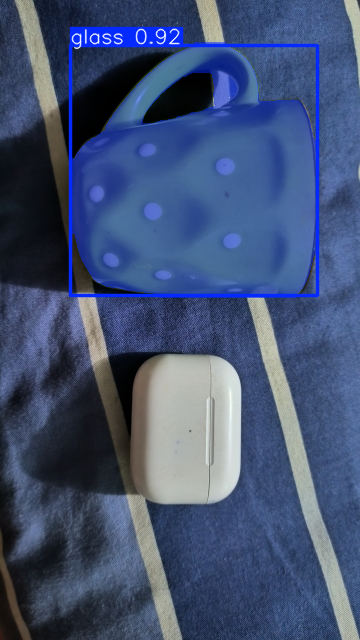

In [59]:
import numpy as np

from ultralytics import YOLOE
from ultralytics.models.yolo.yoloe import YOLOEVPSegPredictor

# Initialize a YOLOE model
model = YOLOE("yoloe-11l-seg.pt")

# Define visual prompts using bounding boxes and their corresponding class IDs.
# Each box highlights an example of the object you want the model to detect.
visual_prompts = dict(
    bboxes=[
        np.array([[21, 164, 301, 423],[41, 207, 336, 428]]),
        np.array([[27, 42, 304, 295],[347, 117, 507, 232],[0,0,0,0],[0,0,0,0]]),
        np.array([[0,0,0,0],[16, 156, 112, 475],[150, 197, 215, 435],[241, 286, 346, 368]]),
        np.array([[0,0,0,0],[0,0,0,0],[22, 20, 351, 338],[84, 370, 351, 517]]),
        np.array([[191, 257, 292, 401],[68, 161, 161, 532]])
    ],
    cls=[
        np.array([0,1,2,3]),
        np.array([0,1,2,3]),
        np.array([0,1,2,3]),
        np.array([0,1,2,3]),
        np.array([0,1]),
    ],
)

# Run inference on multiple image, using the provided visual prompts as guidance
results = model.predict(
    ["/content/1000011922.jpg","/content/1000011923.jpg","/content/Image_3.jpg","/content/Image_1.jpg","/content/Image_2.jpg"],
    visual_prompts=visual_prompts,
    predictor=YOLOEVPSegPredictor,
)
# 🔥 Override class names so results show "glass", "metal", etc.
custom_names = {
    0: "glass",
    1: "metal",
    2: "plastic",
    3: "bio"
}

for r in results:
    r.names = custom_names

# Show results
results[1].show()


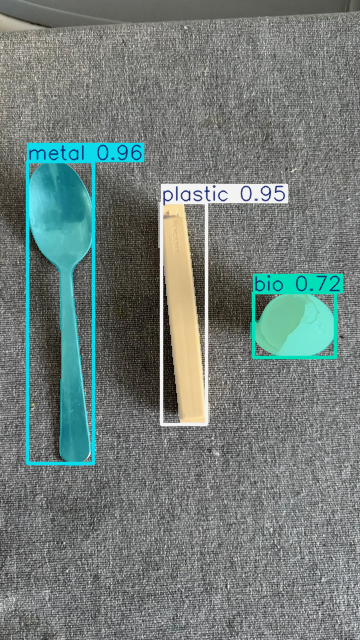

In [60]:
# Show results
results[2].show()

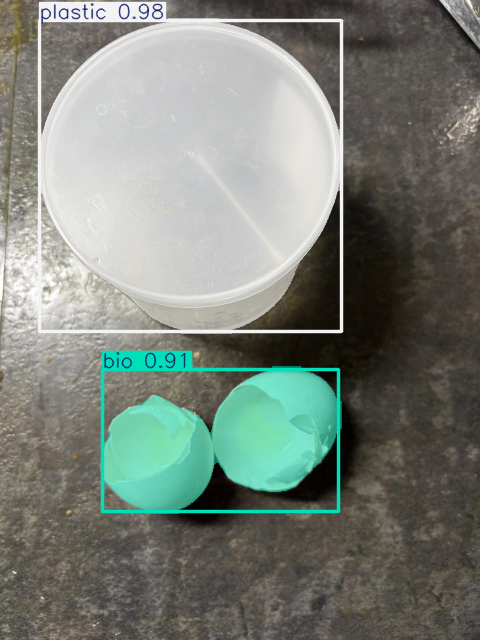

In [61]:
# Show results
results[3].show()

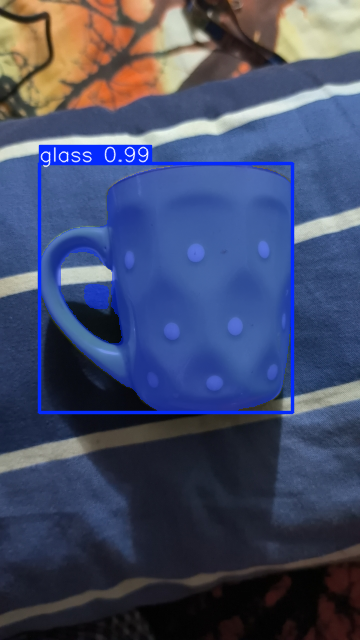

In [62]:
# Show results
results[0].show()

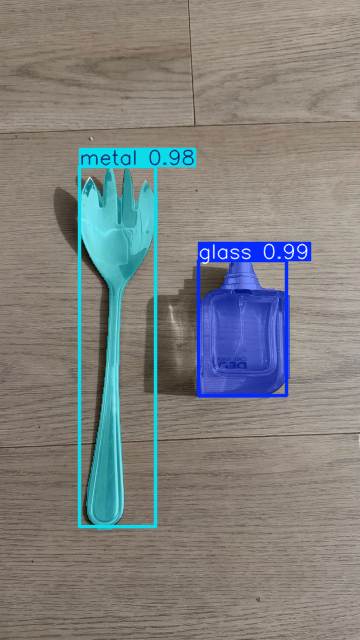

In [63]:
# Show results
results[4].show()